## Code ccomplet, avec PyROOT, TIPP nima et thibault

In [1]:
import sys
print(sys.version)
import ROOT as r
print(r.__version__)


3.10.12 (main, Jan  8 2026, 06:52:19) [GCC 11.4.0]
6.38.00


In [2]:
import ROOT as r
import numpy as np
import math
import pandas as pd

# Opening the table V of the HEP ALICE Data

In [3]:
PbPb_pp_file = r.TFile("ROOTfile/PbPb_pp5tev.root")
PbPb_pp_file

In [4]:
Histo = PbPb_pp_file.Get("Table 5")
Histo.ls()

TDirectoryFile*		Table 5	Table 5
 KEY: TH1F	Hist1D_y1;1	Table 5
 KEY: TH1F	Hist1D_y1_e1;1	Table 5
 KEY: TH1F	Hist1D_y1_e2;1	Table 5
 KEY: TH1F	Hist1D_y1_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y1;1	Table 5
 KEY: TH1F	Hist1D_y2;1	Table 5
 KEY: TH1F	Hist1D_y2_e1;1	Table 5
 KEY: TH1F	Hist1D_y2_e2;1	Table 5
 KEY: TH1F	Hist1D_y2_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y2;1	Table 5
 KEY: TH1F	Hist1D_y3;1	Table 5
 KEY: TH1F	Hist1D_y3_e1;1	Table 5
 KEY: TH1F	Hist1D_y3_e2;1	Table 5
 KEY: TH1F	Hist1D_y3_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y3;1	Table 5
 KEY: TH1F	Hist1D_y4;1	Table 5
 KEY: TH1F	Hist1D_y4_e1;1	Table 5
 KEY: TH1F	Hist1D_y4_e2;1	Table 5
 KEY: TH1F	Hist1D_y4_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y4;1	Table 5
 KEY: TH1F	Hist1D_y5;1	Table 5
 KEY: TH1F	Hist1D_y5_e1;1	Table 5
 KEY: TH1F	Hist1D_y5_e2;1	Table 5
 KEY: TH1F	Hist1D_y5_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y5;1	Table 5
 KEY: TH1F	Hist1D_y6;1	Table 5
 KEY: TH1F	Hist1D_y6_e1;1	Table 5
 KEY: TH1F	H

In [5]:
#The first histogram corresponds to very low centrality (0-5%)

Y1 = Histo.Get("Hist1D_y1;1")
e1 = Histo.Get("Hist1D_y1_e1")
e2 = Histo.Get("Hist1D_y1_e2")
e3 = Histo.Get("Hist1D_y1_e3")


Y1.ls()
#e1.ls()

# This part is to avoid the kernel to crash, so I fix the memory position of my base plot
y1_plot  = Y1.Clone("y1_plot")
y1_plot.SetDirectory(0)



OBJ: TH1F	Hist1D_y1	Table 5 : 0 at: 0x565242dc0850


In [6]:
#Here I calculated the squared sum of uncertainties and place it for each bin

for i in range(0, y1_plot.GetNbinsX()): #nb of bins
    err = math.sqrt( e1.GetBinContent(i)**2 + e2.GetBinContent(i)**2 +  e3.GetBinContent(i)**2)
    y1_plot.SetBinError(i, err) 

In [7]:
c = r.TCanvas("c","c")

y1_plot.SetTitle("pt distribution of p+p- in PbPb collision at 5 Tev")
y1_plot.GetXaxis().SetTitle("pt [Gev/c]")
y1_plot.GetYaxis().SetTitle("(1/Nev)*D²(N)/DptDyrap [(Gev/c)^⁻1]")

y1_plot.Draw("")

c.SaveAs("y1_point.pdf")

Info in <TCanvas::Print>: pdf file y1_point.pdf has been created


In [8]:
## From 0 to 0.3 GeV/c --> NO information this is the low pt content that we can't access from the magnetic deflection
## Then we have the measure from 0.3 to 20 GeV/c

In [9]:
##This is a test to plot exponential function in roofit, 

pt = r.RooRealVar("pt","pt", 0,20)

coeff = r.RooRealVar("c","c", 1)

exp_fit = r.RooExponential("exp_fit","Exp", pt, coeff, True)


ptframe = pt.frame(r.RooFit.Title("Normalized Exponential function in RoofFit"))
exp_fit.plotOn(ptframe)

                                   
c = r.TCanvas()
ptframe.Draw()

c.Draw()

In [10]:
## Import of the datas in the Roofit class
dh = r.RooDataHist("dh", "dh", [pt], Import = y1_plot)


[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable pt expanded to nearest bin boundaries: [0,20] --> [0.3,20]


In [11]:
##function to plot 
def plot_fit(x, data, model, title):
    
    frame = x.frame(r.RooFit.Title(title))
    data.plotOn(frame)
    model.plotOn(frame)

    c = r.TCanvas()
    frame.Draw()
    c.Update()
    
    return (c, frame)
    

In [12]:
## test of the function
a = plot_fit(pt, dh, exp_fit, "Fitting the data with exponential normalized distribution")


[#1] INFO:InputArguments -- RooAbsData::plotOn(dh) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


In [13]:
##problem of normalization...

# Nima code starts from here

### Open the ROOT file and list what objects are inside

In [14]:
path = "ROOTfile/HEPData-1569102768-v1-Table_5.root"   
f = r.TFile.Open(path, "READ")
if not f or f.IsZombie():
    raise RuntimeError(f"Cannot open file: {path}")

f.ls()


TFile**		ROOTfile/HEPData-1569102768-v1-Table_5.root	
 TFile*		ROOTfile/HEPData-1569102768-v1-Table_5.root	
  KEY: TDirectoryFile	Table 5;1	Table 5


In [15]:
d = f.Get("Table 5")
print("Directory object:", d, "class:", d.ClassName())

d.ls()


Directory object: Name: Table 5 Title: Table 5 class: TDirectoryFile
TDirectoryFile*		Table 5	Table 5
 KEY: TH1F	Hist1D_y1;1	Table 5
 KEY: TH1F	Hist1D_y1_e1;1	Table 5
 KEY: TH1F	Hist1D_y1_e2;1	Table 5
 KEY: TH1F	Hist1D_y1_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y1;1	Table 5
 KEY: TH1F	Hist1D_y2;1	Table 5
 KEY: TH1F	Hist1D_y2_e1;1	Table 5
 KEY: TH1F	Hist1D_y2_e2;1	Table 5
 KEY: TH1F	Hist1D_y2_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y2;1	Table 5
 KEY: TH1F	Hist1D_y3;1	Table 5
 KEY: TH1F	Hist1D_y3_e1;1	Table 5
 KEY: TH1F	Hist1D_y3_e2;1	Table 5
 KEY: TH1F	Hist1D_y3_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y3;1	Table 5
 KEY: TH1F	Hist1D_y4;1	Table 5
 KEY: TH1F	Hist1D_y4_e1;1	Table 5
 KEY: TH1F	Hist1D_y4_e2;1	Table 5
 KEY: TH1F	Hist1D_y4_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y4;1	Table 5
 KEY: TH1F	Hist1D_y5;1	Table 5
 KEY: TH1F	Hist1D_y5_e1;1	Table 5
 KEY: TH1F	Hist1D_y5_e2;1	Table 5
 KEY: TH1F	Hist1D_y5_e3;1	Table 5
 KEY: TGraphAsymmErrors	Graph1D_y5;1	Table 5
 KEY: TH

In [16]:
keys = d.GetListOfKeys()
print("N keys in 'Table 5':", keys.GetSize())

for k in keys:
    print(f"{k.GetName():35s}  |  {k.GetClassName():20s}  |  title = {k.GetTitle()}")


N keys in 'Table 5': 50
Hist1D_y1                            |  TH1F                  |  title = Table 5
Hist1D_y1_e1                         |  TH1F                  |  title = Table 5
Hist1D_y1_e2                         |  TH1F                  |  title = Table 5
Hist1D_y1_e3                         |  TH1F                  |  title = Table 5
Graph1D_y1                           |  TGraphAsymmErrors     |  title = Table 5
Hist1D_y2                            |  TH1F                  |  title = Table 5
Hist1D_y2_e1                         |  TH1F                  |  title = Table 5
Hist1D_y2_e2                         |  TH1F                  |  title = Table 5
Hist1D_y2_e3                         |  TH1F                  |  title = Table 5
Graph1D_y2                           |  TGraphAsymmErrors     |  title = Table 5
Hist1D_y3                            |  TH1F                  |  title = Table 5
Hist1D_y3_e1                         |  TH1F                  |  title = Table 5
Hist

#### For each column y_k (so, each centrality class), we have:
#### Hist1D_yk → the spectrum values (binned histogram)
#### Hist1D_yk_e1, Hist1D_yk_e2, Hist1D_yk_e3 → three uncertainty components (stat / syst / syst uncorr)
#### Graph1D_yk → the same data as a TGraphAsymmErrors (useful for drawing points with x- and y-errors)

In [17]:

d = f.Get("Table 5")
### working with first centrality y_1
h  = d.Get("Hist1D_y1")
h1 = d.Get("Hist1D_y1_e1")
h2 = d.Get("Hist1D_y1_e2")
h3 = d.Get("Hist1D_y1_e3")
g  = d.Get("Graph1D_y1")

print("h :", h.ClassName(),  " name:", h.GetName(),  " title:", h.GetTitle())
print("h1:", h1.ClassName(), " name:", h1.GetName(), " title:", h1.GetTitle())
print("h2:", h2.ClassName(), " name:", h2.GetName(), " title:", h2.GetTitle())
print("h3:", h3.ClassName(), " name:", h3.GetName(), " title:", h3.GetTitle())
print("g :", g.ClassName(),  " name:", g.GetName(),  " title:", g.GetTitle())

### default paper HEPData axis:
print("\nAxis titles from Hist1D_y1:")
print("X:", h.GetXaxis().GetTitle())
print("Y:", h.GetYaxis().GetTitle())


h : TH1F  name: Hist1D_y1  title: Table 5
h1: TH1F  name: Hist1D_y1_e1  title: Table 5
h2: TH1F  name: Hist1D_y1_e2  title: Table 5
h3: TH1F  name: Hist1D_y1_e3  title: Table 5
g : TGraphAsymmErrors  name: Graph1D_y1  title: Table 5

Axis titles from Hist1D_y1:
X: $p_{T}$ [$GeV/c$]
Y: (1/Nev)*D2(N)/DPT/DYRAP [$(GeV/c)^{-1}$]


In [18]:
nb = h.GetNbinsX()
print("Nbins for first centrality=", nb)

for ib in range(1, min(nb, 6) + 1):
    x  = h.GetBinCenter(ib) # p_T center
    dx = 0.5 * h.GetBinWidth(ib) #p_T interval for the bin

    y  = h.GetBinContent(ib) 
    e1 = h1.GetBinContent(ib) 
    e2 = h2.GetBinContent(ib)
    e3 = h3.GetBinContent(ib)

    print(f"bin {ib:2d}  x={x:.3f} ± {dx:.3f}   y={y:.4e}   e1={e1:.2e}  e2={e2:.2e}  e3={e3:.2e}")


Nbins for first centrality= 51
bin  1  x=0.325 ± 0.025   y=1.9630e+01   e1=3.02e-01  e2=1.87e+00  e3=6.15e-01
bin  2  x=0.375 ± 0.025   y=2.2065e+01   e1=2.73e-01  e2=1.93e+00  e3=6.92e-01
bin  3  x=0.425 ± 0.025   y=2.5729e+01   e1=2.74e-01  e2=2.02e+00  e3=8.09e-01
bin  4  x=0.475 ± 0.025   y=2.6599e+01   e1=1.19e-01  e2=1.50e+00  e3=1.90e-01
bin  5  x=0.525 ± 0.025   y=2.9029e+01   e1=1.23e-01  e2=1.46e+00  e3=2.99e-01
bin  6  x=0.575 ± 0.025   y=3.1572e+01   e1=1.44e-01  e2=1.52e+00  e3=4.54e-01


### Build ALICE-style objects in ROOT

In [19]:
g_stat = r.TGraphErrors()
g_stat.SetName("g_stat_y1")

ip = 0
### bar unc to follow ALICEE paper
for ib in range(1, h.GetNbinsX() + 1):
    y = h.GetBinContent(ib)
    if y <= 0:
        continue

    x  = h.GetBinCenter(ib)
    dx = 0.0                      # no horizontal error for stat bars
    dy = h1.GetBinContent(ib)     # statistical uncertainty

    g_stat.SetPoint(ip, x, y)
    g_stat.SetPointError(ip, dx, dy)
    ip += 1

print("Stat graph points:", g_stat.GetN())


### create systematic boxes graph to follow the ALICE paper
g_syst = r.TGraphAsymmErrors()
g_syst.SetName("g_syst_y1")

ip = 0
for ib in range(1, h.GetNbinsX() + 1):
    y = h.GetBinContent(ib)
    if y <= 0:
        continue

    x  = h.GetBinCenter(ib)
    dx = 0.5 * h.GetBinWidth(ib)
    dy = h2.GetBinContent(ib)     # correlated systematic

    g_syst.SetPoint(ip, x, y)
    g_syst.SetPointError(ip, dx, dx, dy, dy)
    ip += 1

print("Syst graph points:", g_syst.GetN())


Stat graph points: 51
Syst graph points: 51


### Draw the first “official” spectrum plot

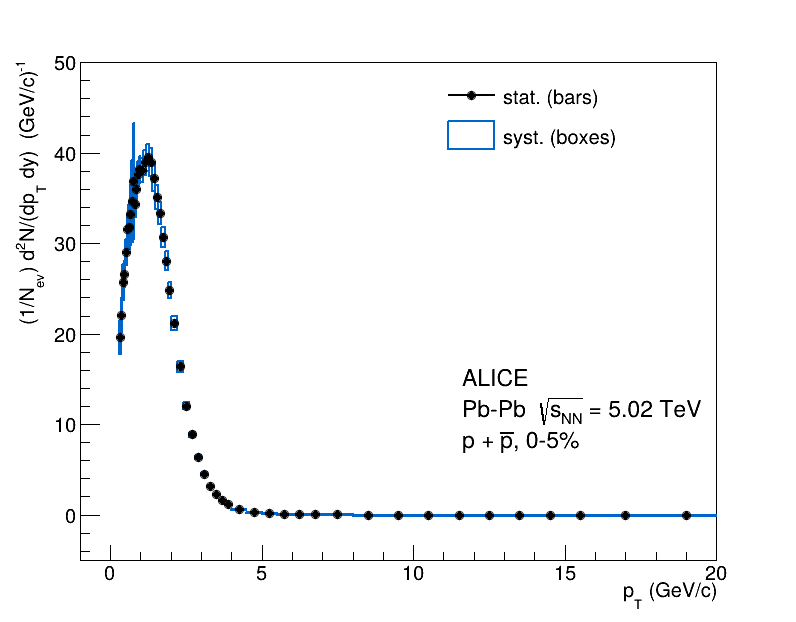

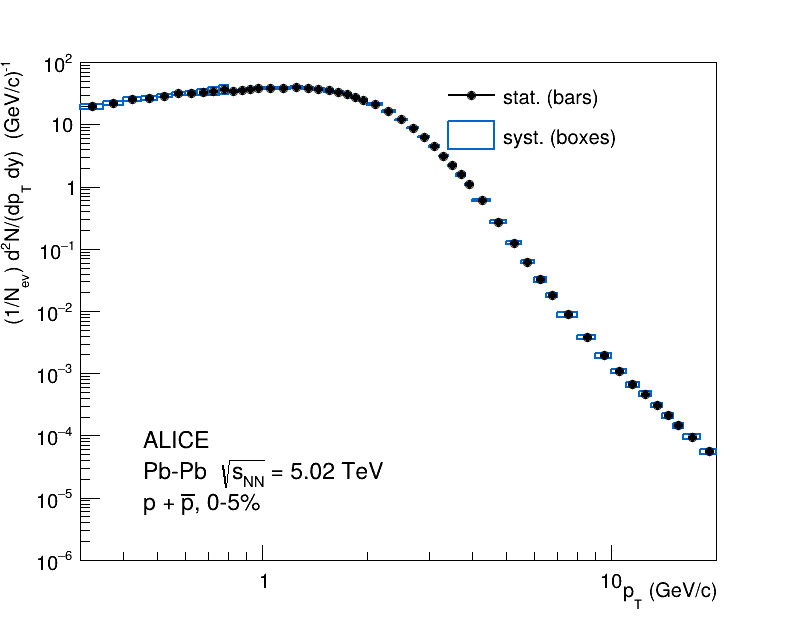

Info in <TCanvas::Print>: pdf file PbPb_5020_p_pbar_0_5_linear.pdf has been created
Info in <TCanvas::Print>: png file PbPb_5020_p_pbar_0_5_linear.png has been created
Info in <TCanvas::Print>: pdf file PbPb_5020_p_pbar_0_5_loglog.pdf has been created
Info in <TCanvas::Print>: png file PbPb_5020_p_pbar_0_5_loglog.png has been created


In [20]:
import ROOT as r
from IPython.display import Image, display

# ---------- global style (ALICE-like)
r.gStyle.SetOptStat(0)
r.gStyle.SetTextFont(42)
r.gStyle.SetLabelFont(42, "XYZ")
r.gStyle.SetTitleFont(42, "XYZ")
r.gStyle.SetLegendFont(42)

col_stat = r.kBlack
col_syst = r.kAzure + 2

# ---------- helper: style graphs
def style_graphs(g_stat, g_syst):
    # syst boxes
    g_syst.SetFillStyle(0)
    g_syst.SetLineColor(col_syst)
    g_syst.SetLineWidth(2)

    # stat points + bars
    g_stat.SetMarkerStyle(20)
    g_stat.SetMarkerSize(1.0)
    g_stat.SetMarkerColor(col_stat)
    g_stat.SetLineColor(col_stat)
    g_stat.SetLineWidth(2)

# ---------- helper: draw ALICE labels (automatic placement)
def draw_alice_labels(label_text, log_plot=False):
    if log_plot:
        x, y0 = 0.18, 0.28   # top-left for log plots
    else:
        x, y0 = 0.58, 0.38   # bottom-left for linear plots

    dy = 0.05

    tex = r.TLatex()
    tex.SetNDC()
    tex.SetTextFont(42)
    tex.SetTextSize(0.04)
    tex.DrawLatex(x, y0,        "ALICE")
    tex.DrawLatex(x, y0 - dy,   "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
    tex.DrawLatex(x, y0 - 2*dy, label_text)

# ---------- helper: draw one spectrum
def draw_spectrum(
    g_stat, g_syst, label_text,
    xmin, ymin, xmax, ymax,
    logx=False, logy=False,
    out_prefix="plot"
):
    cname = f"c_{out_prefix}_{r.gRandom.Integer(10**9)}"
    c = r.TCanvas(cname, "", 800, 650)
    c.SetLogx(1 if logx else 0)
    c.SetLogy(1 if logy else 0)

    frame = c.DrawFrame(xmin, ymin, xmax, ymax)
    frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
    frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

    # draw objects
    g_syst.Draw("E2 SAME")
    g_stat.Draw("P SAME")

    # legend (keep consistent)
    leg = r.TLegend(0.55, 0.75, 0.88, 0.88)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    leg.SetTextSize(0.035)
    leg.AddEntry(g_stat, "stat. (bars)", "lp")
    leg.AddEntry(g_syst, "syst. (boxes)", "f")
    leg.Draw()

    # labels (automatic placement)
    draw_alice_labels(label_text, log_plot=(logx or logy))

    c.Update()

    pdf = f"{out_prefix}.pdf"
    png = f"{out_prefix}.png"
    c.SaveAs(pdf)
    c.SaveAs(png)

    display(Image(png))

# ---------- apply styles once
style_graphs(g_stat, g_syst)

# ---------- linear plot
draw_spectrum(
    g_stat, g_syst,
    label_text="p + #bar{p}, 0-5%",
    xmin=-1, ymin=-5, xmax=20.0, ymax=50,
    logx=False, logy=False,
    out_prefix="PbPb_5020_p_pbar_0_5_linear"
)

# ---------- log-log plot (positive limits!)
draw_spectrum(
    g_stat, g_syst,
    label_text="p + #bar{p}, 0-5%",
    xmin=0.3, ymin=1e-6, xmax=20.0, ymax=1e2,
    logx=True, logy=True,
    out_prefix="PbPb_5020_p_pbar_0_5_loglog"
)


## Boltzmann fit and fit range

Fit range: [0.3, 19.0] GeV/c
chi2/ndf = 32473.74 / 49 = 662.73
A = 524.898 ± 0.704
T = 0.466437 ± 0.00016 GeV


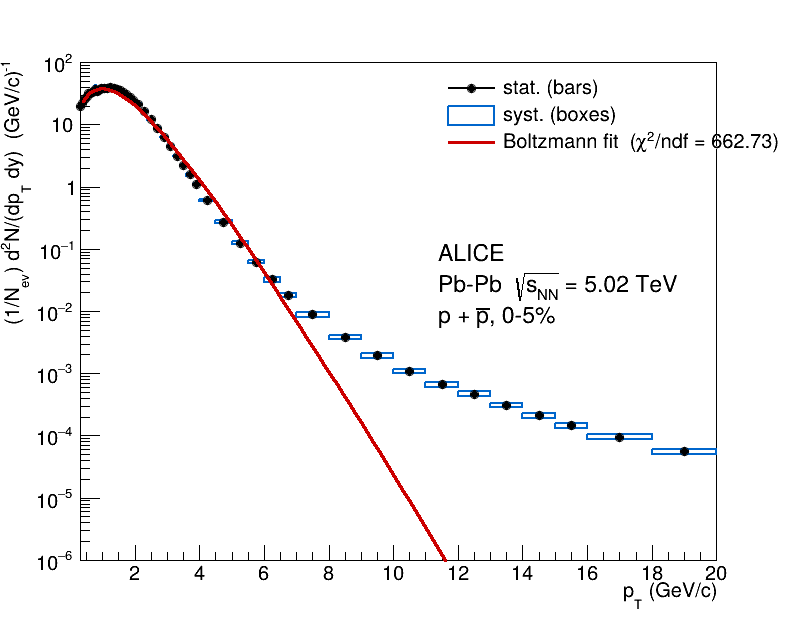

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      32473.7
NDf                       =           49
Edm                       =  5.28635e-08
NCalls                    =           90
A                         =      524.898   +/-   0.703618    
T                         =     0.466437   +/-   0.000159659 


Info in <TCanvas::Print>: png file boltz_fit_0_5.png has been created
Info in <TCanvas::Print>: pdf file boltz_fit_0_5.pdf has been created


In [21]:
# ---- proton mass (GeV/c^2)
m_p = 0.9382720813

fit_min, fit_max = 0.3, 19.0

# ---- Boltzmann-like shape for d^2N/(dpT dy):  A * pT * mT * exp(-mT/T)
# x[0]=pT, par[0]=A, par[1]=T
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

f_boltz = r.TF1("f_boltz", boltz_dpTdy, fit_min, fit_max, 2)
f_boltz.SetParNames("A", "T")
f_boltz.SetParameters(1e2, 0.3)      # initial guesses
f_boltz.SetLineColor(r.kRed+1)
f_boltz.SetLineWidth(3)

# ---- Fit (stat errors only because g_stat carries stat errors), we kater use the stat + sys uncorr
fit_res = g_stat.Fit(f_boltz, "RS0")

chi2 = fit_res.Chi2()
ndf  = fit_res.Ndf()
chi2ndf = chi2/ndf if ndf > 0 else float("nan")

print(f"Fit range: [{fit_min}, {fit_max}] GeV/c")
print(f"chi2/ndf = {chi2:.2f} / {ndf} = {chi2/ndf:.2f}")
print(f"A = {f_boltz.GetParameter(0):.6g} ± {f_boltz.GetParError(0):.3g}")
print(f"T = {f_boltz.GetParameter(1):.6g} ± {f_boltz.GetParError(1):.3g} GeV")

# ---- Make a fresh canvas and draw everything (so you always SEE it)
c = r.TCanvas(f"c_fit_{r.gRandom.Integer(10**9)}", "Boltzmann fit", 800, 650)
c.SetLogy(1)  # spectra are usually shown log-y

frame = c.DrawFrame(0.3, 1e-6, 20.0, 1e2)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

# style to make errors visible in notebook
g_syst.SetFillStyle(0)
g_syst.SetLineWidth(2)
g_syst.Draw("E2 SAME")

g_stat.SetLineWidth(2)
g_stat.SetMarkerStyle(20)
g_stat.SetMarkerSize(1.0)
g_stat.Draw("P SAME")

f_boltz.Draw("SAME")

leg = r.TLegend(0.55, 0.75, 0.88, 0.88)
leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.035)
leg.AddEntry(g_stat, "stat. (bars)", "lp")
leg.AddEntry(g_syst, "syst. (boxes)", "f")
leg.AddEntry(f_boltz, f"Boltzmann fit  (#chi^{{2}}/ndf = {chi2ndf:.2f})", "l")
leg.Draw()


tex = r.TLatex()
tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
tex.DrawLatex(0.55, 0.58, "ALICE")
tex.DrawLatex(0.55, 0.53, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.55, 0.48, "p + #bar{p}, 0-5%")

c.Update()

out_png = "boltz_fit_0_5.png"
out_pdf = "boltz_fit_0_5.pdf"
c.SaveAs(out_png)
c.SaveAs(out_pdf)
display(Image(out_png))

Fit range: [0.3, 4.0] GeV/c
chi2/ndf = 14351.38 / 32 = 448.48
A = 527.913 ± 0.878
T = 0.465908 ± 0.000223 GeV


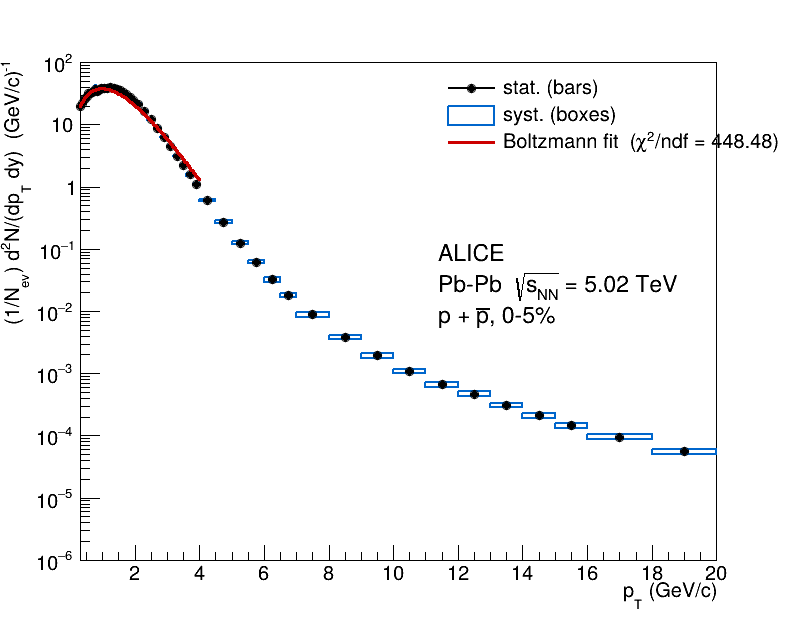

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      14351.4
NDf                       =           32
Edm                       =  1.07472e-07
NCalls                    =          100
A                         =      527.913   +/-   0.877654    
T                         =     0.465908   +/-   0.000223364 


Info in <TCanvas::Print>: png file boltz_fit_0_5.png has been created
Info in <TCanvas::Print>: pdf file boltz_fit_0_5.pdf has been created


In [22]:
# ---- proton mass (GeV/c^2)
m_p = 0.9382720813

# ---- choose a conservative "soft" fit range first
# --- Fit range: start at 0.3 because data start at 0.3 GeV/c (Table 5)
# Upper bound: for a simple Boltzmann shape, we keep it in the soft region first.
fit_min, fit_max = 0.3, 4.0

# ---- Boltzmann-like shape for d^2N/(dpT dy):  A * pT * mT * exp(-mT/T)
# x[0]=pT, par[0]=A, par[1]=T
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

f_boltz = r.TF1("f_boltz", boltz_dpTdy, fit_min, fit_max, 2)
f_boltz.SetParNames("A", "T")
f_boltz.SetParameters(1e2, 0.3)      # initial guesses
f_boltz.SetLineColor(r.kRed+1)
f_boltz.SetLineWidth(3)

# ---- Fit (stat errors only because g_stat carries stat errors)
fit_res = g_stat.Fit(f_boltz, "RS0")

chi2 = fit_res.Chi2()
ndf  = fit_res.Ndf()
chi2ndf = chi2/ndf if ndf > 0 else float("nan")

print(f"Fit range: [{fit_min}, {fit_max}] GeV/c")
print(f"chi2/ndf = {chi2:.2f} / {ndf} = {chi2/ndf:.2f}")
print(f"A = {f_boltz.GetParameter(0):.6g} ± {f_boltz.GetParError(0):.3g}")
print(f"T = {f_boltz.GetParameter(1):.6g} ± {f_boltz.GetParError(1):.3g} GeV")

# ---- Make a fresh canvas and draw everything (so you always SEE it)
c = r.TCanvas(f"c_fit_{r.gRandom.Integer(10**9)}", "Boltzmann fit", 800, 650)
c.SetLogy(1)  # spectra are usually shown log-y

frame = c.DrawFrame(0.3, 1e-6, 20.0, 1e2)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

# style to make errors visible in notebook
g_syst.SetFillStyle(0)
g_syst.SetLineWidth(2)
g_syst.Draw("E2 SAME")

g_stat.SetLineWidth(2)
g_stat.SetMarkerStyle(20)
g_stat.SetMarkerSize(1.0)
g_stat.Draw("P SAME")

f_boltz.Draw("SAME")

leg = r.TLegend(0.55, 0.75, 0.88, 0.88)
leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.035)
leg.AddEntry(g_stat, "stat. (bars)", "lp")
leg.AddEntry(g_syst, "syst. (boxes)", "f")
leg.AddEntry(f_boltz, f"Boltzmann fit  (#chi^{{2}}/ndf = {chi2ndf:.2f})", "l")
leg.Draw()

tex = r.TLatex()
tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
tex.DrawLatex(0.55, 0.58, "ALICE")
tex.DrawLatex(0.55, 0.53, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.55, 0.48, "p + #bar{p}, 0-5%")

c.Update()

out_png = "boltz_fit_0_5.png"
out_pdf = "boltz_fit_0_5.pdf"
c.SaveAs(out_png)
c.SaveAs(out_pdf)
display(Image(out_png))

### using two uncertainties

Fit range: [0.3, 4.0] GeV/c
chi2/ndf = 678.83 / 32 = 21.21
A = 576.939 ± 4.15
T = 0.450768 ± 0.000629 GeV


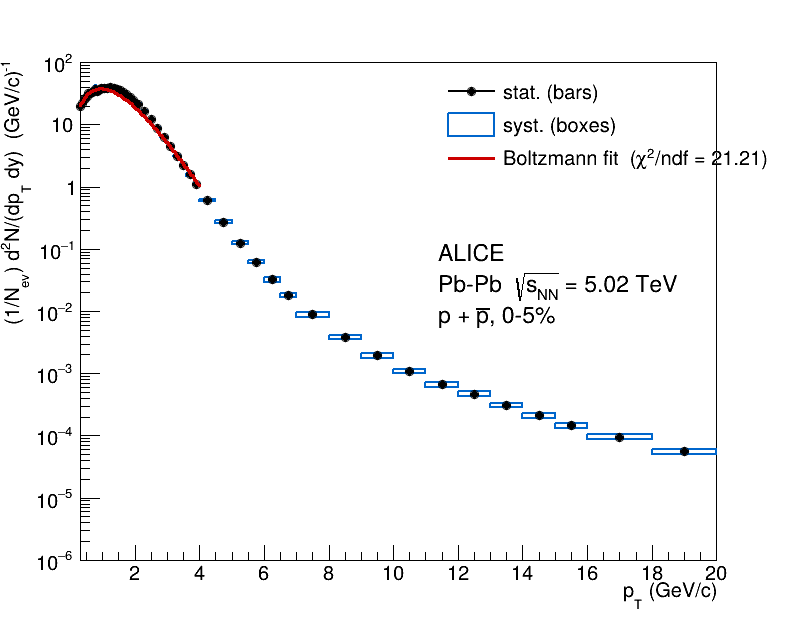

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      678.829
NDf                       =           32
Edm                       =  2.36617e-11
NCalls                    =           94
A                         =      576.939   +/-   4.14501     
T                         =     0.450768   +/-   0.000628636 


Info in <TCanvas::Print>: png file boltz_fit_0_5.png has been created
Info in <TCanvas::Print>: pdf file boltz_fit_0_5.pdf has been created


In [23]:
# ---- proton mass (GeV/c^2)
m_p = 0.9382720813

# ---- fit range
fit_min, fit_max = 0.3, 4.0

# ---- Boltzmann-like shape for d^2N/(dpT dy):  A * pT * mT * exp(-mT/T)
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

f_boltz = r.TF1("f_boltz", boltz_dpTdy, fit_min, fit_max, 2)
f_boltz.SetParNames("A", "T")
f_boltz.SetParameters(1e2, 0.3)      # initial guesses
f_boltz.SetLineColor(r.kRed+1)
f_boltz.SetLineWidth(3)

# ---- Build effective-error graph for fitting: stat ⊕ syst_uncorr in quadrature
#      (use histograms: h = values, h1 = stat, h3 = syst_uncorr)
g_eff = r.TGraphErrors()
g_eff.SetName("g_eff_stat_plus_systuncorr")

ip = 0
for ib in range(1, h.GetNbinsX() + 1):
    y = h.GetBinContent(ib)
    if y <= 0:
        continue

    x  = h.GetBinCenter(ib)
    e_stat = h1.GetBinContent(ib)
    e_unc  = h3.GetBinContent(ib)  # syst uncorrelated
    e_eff  = math.sqrt(e_stat*e_stat + e_unc*e_unc)

    g_eff.SetPoint(ip, x, y)
    g_eff.SetPointError(ip, 0.0, e_eff)
    ip += 1

# ---- Fit using effective errors (chi2 now uses stat ⊕ syst_uncorr)
fit_res = g_eff.Fit(f_boltz, "RS0")

chi2 = fit_res.Chi2()
ndf  = fit_res.Ndf()
chi2ndf = chi2/ndf if ndf > 0 else float("nan")

print(f"Fit range: [{fit_min}, {fit_max}] GeV/c")
print(f"chi2/ndf = {chi2:.2f} / {ndf} = {chi2ndf:.2f}")
print(f"A = {f_boltz.GetParameter(0):.6g} ± {f_boltz.GetParError(0):.3g}")
print(f"T = {f_boltz.GetParameter(1):.6g} ± {f_boltz.GetParError(1):.3g} GeV")

# ---- Make a fresh canvas and draw everything
c = r.TCanvas(f"c_fit_{r.gRandom.Integer(10**9)}", "Boltzmann fit", 800, 650)
c.SetLogy(1)

frame = c.DrawFrame(0.3, 1e-6, 20.0, 1e2)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

# ---- Draw systematic boxes (correlated) from g_syst (built from h2)
g_syst.SetFillStyle(0)
g_syst.SetLineWidth(2)
g_syst.Draw("E2 SAME")

# ---- Draw stat bars + markers (visual convention): keep showing stat-only bars
g_stat.SetLineWidth(2)
g_stat.SetMarkerStyle(20)
g_stat.SetMarkerSize(1.0)
g_stat.Draw("P SAME")

# ---- Fit curve
f_boltz.Draw("SAME")

# ---- Legend with chi2/ndf under the fit label
leg = r.TLegend(0.55, 0.72, 0.88, 0.88)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetTextSize(0.035)
leg.AddEntry(g_stat, "stat. (bars)", "lp")
leg.AddEntry(g_syst, "syst. (boxes)", "f")
leg.AddEntry(f_boltz, f"Boltzmann fit  (#chi^{{2}}/ndf = {chi2ndf:.2f})", "l")
leg.Draw()

# ---- Labels
tex = r.TLatex()
tex.SetNDC()
tex.SetTextFont(42)
tex.SetTextSize(0.04)
tex.DrawLatex(0.55, 0.58, "ALICE")
tex.DrawLatex(0.55, 0.53, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.55, 0.48, "p + #bar{p}, 0-5%")

c.Update()

out_png = "boltz_fit_0_5.png"
out_pdf = "boltz_fit_0_5.pdf"
c.SaveAs(out_png)
c.SaveAs(out_pdf)
display(Image(out_png))

## Extrapolation

In [24]:

# Define integration boundaries
pt_low_data  = 0.3
pt_high_data = 20.0
pt_max       = 100.0   # acts like infinity for exponential-type tails

# We make sure the TF1 is defined over the full integration range
f_boltz.SetRange(0.0, pt_max)

I_low   = f_boltz.Integral(0.0, pt_low_data)
I_meas  = f_boltz.Integral(pt_low_data, pt_high_data)
I_high  = f_boltz.Integral(pt_high_data, pt_max)
I_total = I_low + I_meas + I_high

print("Integrals of fitted spectrum f(pT) dpT:")
print(f"  I_low   (0 -> {pt_low_data})      = {I_low:.6g}")
print(f"  I_meas  ({pt_low_data} -> {pt_high_data}) = {I_meas:.6g}")
print(f"  I_high  ({pt_high_data} -> {pt_max}) = {I_high:.6g}")
print(f"  I_total (0 -> {pt_max})      = {I_total:.6g}")

if I_total > 0:
    print("\nFractions:")
    print(f"  low extrapolated fraction  = {I_low/I_total:.4%}")
    print(f"  measured fraction          = {I_meas/I_total:.4%}")
    print(f"  high extrapolated fraction = {I_high/I_total:.4%}")


Integrals of fitted spectrum f(pT) dpT:
  I_low   (0 -> 0.3)      = 2.95637
  I_meas  (0.3 -> 20.0) = 66.2292
  I_high  (20.0 -> 100.0) = 5.58944e-15
  I_total (0 -> 100.0)      = 69.1856

Fractions:
  low extrapolated fraction  = 4.2731%
  measured fraction          = 95.7269%
  high extrapolated fraction = 0.0000%


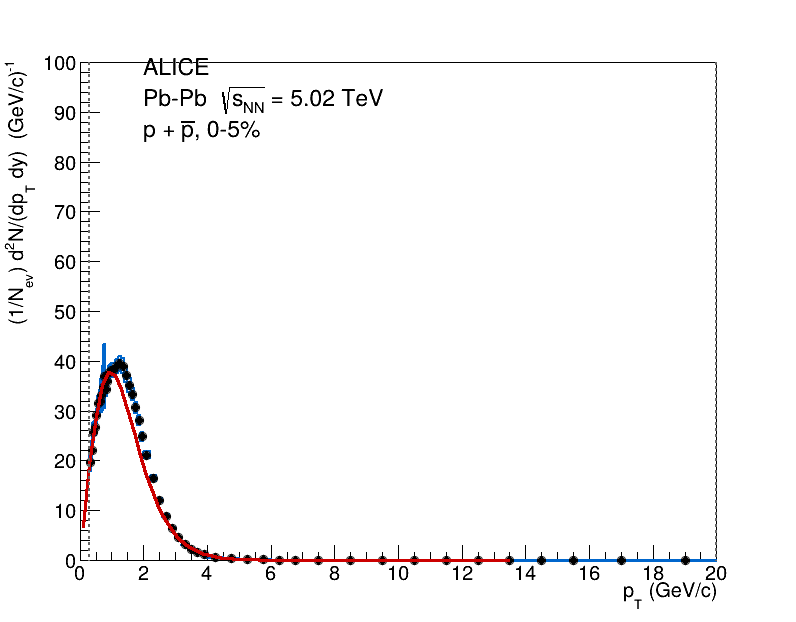

Info in <TCanvas::Print>: png file extrapolation_view.png has been created


In [25]:

# --- sanity: make sure we are drawing on canvas c
c.cd()                 # make c the current canvas/pad
c.SetLogy(0)           # keep log-y if that's how you plotted
c.Clear()              # optional: start clean so you SEE everything

# --- frame (must include pT=0 and positive y range for log)
ymin, ymax = 1e-8, 1e2
frame = c.DrawFrame(0.0, ymin, 20.0, ymax)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

# --- draw data again
g_syst.Draw("E2 SAME")
g_stat.Draw("P SAME")

# --- extend function range to show extrapolation and redraw
f_boltz.SetRange(0.0, 20.0)
f_boltz.Draw("SAME")

# --- mark measured region boundaries
l_low  = r.TLine(0.3, ymin, 0.3, ymax)
l_high = r.TLine(20.0, ymin, 20.0, ymax)

for L in (l_low, l_high):
    L.SetLineStyle(2)
    L.SetLineWidth(2)
    L.SetLineColor(r.kGray+2)
    L.Draw("SAME")

# --- labels (optional)
tex = r.TLatex()
tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
tex.DrawLatex(0.18, 0.88, "ALICE")
tex.DrawLatex(0.18, 0.83, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.18, 0.78, "p + #bar{p}, 0-5%")

c.Update()

# --- save and show (PNG display is reliable in Jupyter)
png = "extrapolation_view.png"
c.SaveAs(png)
display(Image(png))


Fit range: [0.3, 19.0] GeV/c
chi2/ndf = 12683.51 / 49 = 258.85
A = 478.577 ± 3.12
T = 0.468525 ± 0.0004 GeV

Integrals of fitted spectrum f(pT) dpT:
  I_low   (0 -> 0.3)          = 2.65886
  I_meas  (0.3 -> 20.0)     = 63.8852
  I_high  (20.0 -> 100.0)     = 2.59923e-14
  I_total (0 -> 100.0)          = 66.544

Fractions:
  low extrapolated fraction  = 3.9956%
  measured fraction          = 96.0044%
  high extrapolated fraction = 0.0000%


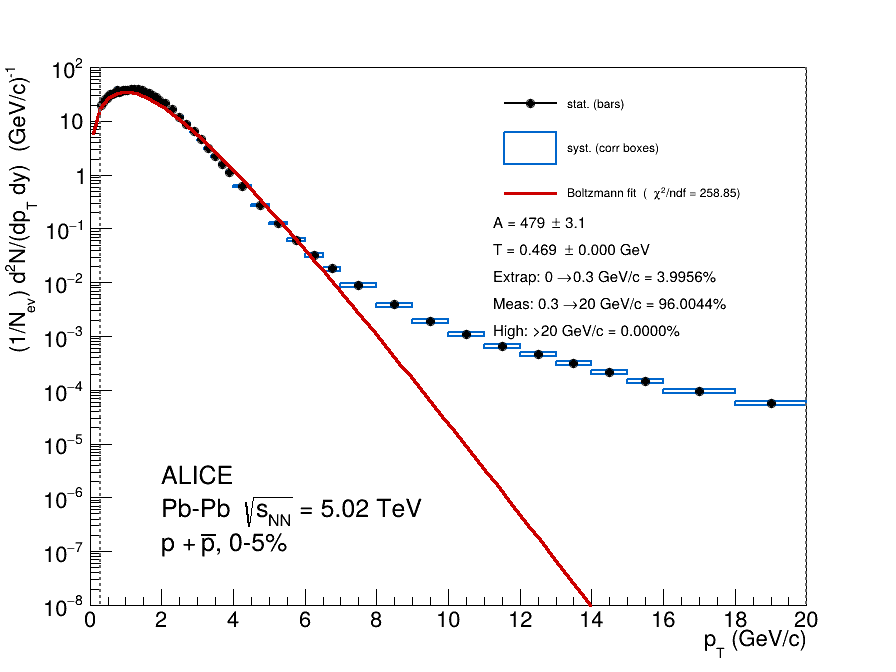

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      12683.5
NDf                       =           49
Edm                       =  2.01478e-06
NCalls                    =           95
A                         =      478.577   +/-   3.12244     
T                         =     0.468525   +/-   0.000400142 


Info in <TCanvas::Print>: png file extrapolation_boltz_0_5.png has been created
Info in <TCanvas::Print>: pdf file extrapolation_boltz_0_5.pdf has been created


In [26]:

# =========================
# 0) SETTINGS (edit here)
# =========================
label_text   = "p + #bar{p}, 0-5%"
fit_min      = 0.3
fit_max      = 19.0            # fit range (as you requested)
pt_low_data  = 0.3
pt_high_data = 20.0
pt_max_int   = 100.0           # "infinity" for the high tail integral

# Plot ranges (must be >0 for log)
x_plot_min, x_plot_max = 0.0, 20.0
y_plot_min, y_plot_max = 1e-8, 1e2

# Colors
col_stat = r.kBlack
col_syst = r.kAzure + 2
col_fit  = r.kRed + 1

# Proton mass (GeV/c^2)
m_p = 0.9382720813

# =========================
# 1) BUILD "EFFECTIVE ERROR" GRAPH FOR FIT
#    sigma_eff^2 = stat^2 + syst_uncorr^2
#    Assumes you already have: h, h1 (stat), h2 (syst corr), h3 (syst uncorr)
# =========================
g_eff = r.TGraphErrors()
g_eff.SetName("g_eff_stat_plus_systuncorr")

ip = 0
for ib in range(1, h.GetNbinsX() + 1):
    y = h.GetBinContent(ib)
    if y <= 0:
        continue
    x = h.GetBinCenter(ib)

    e_stat = h1.GetBinContent(ib)
    e_unc  = h3.GetBinContent(ib)
    e_eff  = math.sqrt(e_stat*e_stat + e_unc*e_unc)

    g_eff.SetPoint(ip, x, y)
    g_eff.SetPointError(ip, 0.0, e_eff)
    ip += 1

# =========================
# 2) DEFINE BOLTZMANN FUNCTION AND FIT
#    f(pT) = A * pT * mT * exp(-mT/T)
# =========================
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

f_boltz = r.TF1("f_boltz", boltz_dpTdy, fit_min, fit_max, 2)
f_boltz.SetParNames("A", "T")
f_boltz.SetParameters(1e2, 0.3)
f_boltz.SetLineColor(col_fit)
f_boltz.SetLineWidth(3)

fit_res = g_eff.Fit(f_boltz, "RS0")
chi2 = fit_res.Chi2()
ndf  = fit_res.Ndf()
chi2ndf = chi2/ndf if ndf > 0 else float("nan")

A_val, A_err = f_boltz.GetParameter(0), f_boltz.GetParError(0)
T_val, T_err = f_boltz.GetParameter(1), f_boltz.GetParError(1)

print(f"Fit range: [{fit_min}, {fit_max}] GeV/c")
print(f"chi2/ndf = {chi2:.2f} / {ndf} = {chi2ndf:.2f}")
print(f"A = {A_val:.6g} ± {A_err:.3g}")
print(f"T = {T_val:.6g} ± {T_err:.3g} GeV")

# =========================
# 3) EXTRAPOLATION INTEGRALS
# =========================
f_boltz.SetRange(0.0, pt_max_int)  # ensure integrals can be computed everywhere

I_low   = f_boltz.Integral(0.0, pt_low_data)
I_meas  = f_boltz.Integral(pt_low_data, pt_high_data)
I_high  = f_boltz.Integral(pt_high_data, pt_max_int)
I_total = I_low + I_meas + I_high

low_frac  = I_low/I_total  if I_total > 0 else 0.0
meas_frac = I_meas/I_total if I_total > 0 else 0.0
high_frac = I_high/I_total if I_total > 0 else 0.0

print("\nIntegrals of fitted spectrum f(pT) dpT:")
print(f"  I_low   (0 -> {pt_low_data})          = {I_low:.6g}")
print(f"  I_meas  ({pt_low_data} -> {pt_high_data})     = {I_meas:.6g}")
print(f"  I_high  ({pt_high_data} -> {pt_max_int})     = {I_high:.6g}")
print(f"  I_total (0 -> {pt_max_int})          = {I_total:.6g}")
print("\nFractions:")
print(f"  low extrapolated fraction  = {low_frac:.4%}")
print(f"  measured fraction          = {meas_frac:.4%}")
print(f"  high extrapolated fraction = {high_frac:.4%}")

# =========================
# 4) STYLE THE GRAPHS FOR DISPLAY (ALICE-like)
#    Data display convention:
#      - g_stat: stat bars
#      - g_syst: correlated syst boxes
# =========================
# syst boxes
g_syst.SetFillStyle(0)
g_syst.SetLineColor(col_syst)
g_syst.SetLineWidth(2)

# stat points+bars
g_stat.SetMarkerStyle(20)
g_stat.SetMarkerSize(1.0)
g_stat.SetMarkerColor(col_stat)
g_stat.SetLineColor(col_stat)
g_stat.SetLineWidth(2)

# =========================
# 5) DRAW FINAL "EXTRAPOLATION" PLOT
# =========================
c = r.TCanvas(f"c_extrap_{r.gRandom.Integer(10**9)}", "Extrapolation plot", 900, 700)
c.SetLogy(1)
c.SetLogx(0)  # keep linear x for visibility near pT~0 (change to 1 if you want log-x)

frame = c.DrawFrame(x_plot_min, y_plot_min, x_plot_max, y_plot_max)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

# Draw correlated syst boxes then stat points
g_syst.Draw("E2 SAME")
g_stat.Draw("P SAME")

# Draw fit curve across the plotted domain (including extrapolation)
f_boltz.SetRange(0.0, x_plot_max)
f_boltz.Draw("SAME")

# Vertical lines marking measured region boundaries
l_low  = r.TLine(pt_low_data,  y_plot_min, pt_low_data,  y_plot_max)
l_high = r.TLine(pt_high_data, y_plot_min, pt_high_data, y_plot_max)
for L in (l_low, l_high):
    L.SetLineStyle(2)
    L.SetLineWidth(2)
    L.SetLineColor(r.kGray+2)
    L.Draw("SAME")

# Legend (includes chi2/ndf)
leg = r.TLegend(0.55, 0.68, 0.88, 0.88)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetTextFont(42)
leg.SetTextSize(0.02)
leg.AddEntry(g_stat, "stat. (bars)", "lp")
leg.AddEntry(g_syst, "syst. (corr boxes)", "f")
leg.AddEntry(f_boltz, f"Boltzmann fit  (#chi^{{2}}/ndf = {chi2ndf:.2f})", "l")
leg.Draw()

# ALICE header text (top-left)
tex = r.TLatex()
tex.SetNDC()
tex.SetTextFont(42)
tex.SetTextSize(0.04)
tex.DrawLatex(0.18, 0.28, "ALICE")
tex.DrawLatex(0.18, 0.23, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.18, 0.18, label_text)

# Fit parameters + extrapolation fractions box
# Use TLatex lines in NDC so it stays in place
box = r.TLatex()
box.SetNDC()
box.SetTextFont(42)
box.SetTextSize(0.025)

x0, y0, dy = 0.55, 0.66, 0.04
box.DrawLatex(x0, y0,          f"A = {A_val:.3g} #pm {A_err:.2g}")
box.DrawLatex(x0, y0 - 1*dy,   f"T = {T_val:.3f} #pm {T_err:.3f} GeV")
box.DrawLatex(x0, y0 - 2*dy,   f"Extrap: 0#rightarrow{pt_low_data:.1f} GeV/c = {low_frac*100:.4f}%")
box.DrawLatex(x0, y0 - 3*dy,   f"Meas: {pt_low_data:.1f}#rightarrow{pt_high_data:.0f} GeV/c = {meas_frac*100:.4f}%")
box.DrawLatex(x0, y0 - 4*dy,   f"High: >{pt_high_data:.0f} GeV/c = {high_frac*100:.4f}%")

c.Update()

# Save + show
out_png = "extrapolation_boltz_0_5.png"
out_pdf = "extrapolation_boltz_0_5.pdf"
c.SaveAs(out_png)
c.SaveAs(out_pdf)
display(Image(out_png))


## centrality loop and save data

In [27]:
import ROOT as r
import math
import os
import pandas as pd
from IPython.display import display
from array import array

# -----------------------
# INPUTS / SETTINGS
# -----------------------
outdir = "PbPb_p_pbar_Table5_Boltzmann"
os.makedirs(outdir, exist_ok=True)

# Centrality labels for y1..y10 (Table 5 Pb–Pb classes)
centralities = ["0-5%", "5-10%", "10-20%", "20-30%", "30-40%",
                "40-50%", "50-60%", "60-70%", "70-80%", "80-90%"]

# Physics + integration limits
m_p = 0.9382720813
pt_low_data  = 0.3
pt_high_data = 20.0
pt_max_int   = 100.0  # "infinity" for exp-like tail

# Fit range (you can tune later)
fit_min, fit_max = 0.3, 19.0

# Plot ranges (log-y spectra)
x_plot_min, x_plot_max = 0.0, 20.0
y_plot_min, y_plot_max = 1e-8, 1e2

# Colors
col_stat = r.kBlack
col_syst = r.kAzure + 2
col_fit  = r.kRed + 1

# ROOT style
r.gStyle.SetOptStat(0)
r.gStyle.SetTextFont(42)
r.gStyle.SetLabelFont(42, "XYZ")
r.gStyle.SetTitleFont(42, "XYZ")
r.gStyle.SetLegendFont(42)

# -----------------------
# Boltzmann function: f(pT) = A * pT * mT * exp(-mT/T)
# -----------------------
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

# For <pT>: numerator integrand pT * f(pT)
def boltz_pt_times(x, par):
    return x[0] * boltz_dpTdy(x, par)

# -----------------------
# Utility: build graphs for one yk
# -----------------------
def build_graphs(d, k):
    h  = d.Get(f"Hist1D_y{k}")
    h1 = d.Get(f"Hist1D_y{k}_e1")  # stat
    h2 = d.Get(f"Hist1D_y{k}_e2")  # syst corr (boxes)
    h3 = d.Get(f"Hist1D_y{k}_e3")  # syst uncorr

    # stat graph (bars)
    g_stat = r.TGraphErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x  = h.GetBinCenter(ib)
        dy = h1.GetBinContent(ib)
        g_stat.SetPoint(ip, x, y)
        g_stat.SetPointError(ip, 0.0, dy)
        ip += 1

    # syst corr boxes
    g_syst = r.TGraphAsymmErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x  = h.GetBinCenter(ib)
        dx = 0.5*h.GetBinWidth(ib)
        dy = h2.GetBinContent(ib)
        g_syst.SetPoint(ip, x, y)
        g_syst.SetPointError(ip, dx, dx, dy, dy)
        ip += 1

    # effective fit errors: stat ⊕ syst_uncorr
    g_eff = r.TGraphErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x = h.GetBinCenter(ib)
        e_stat = h1.GetBinContent(ib)
        e_unc  = h3.GetBinContent(ib)
        e_eff  = math.sqrt(e_stat*e_stat + e_unc*e_unc)
        g_eff.SetPoint(ip, x, y)
        g_eff.SetPointError(ip, 0.0, e_eff)
        ip += 1

    # style (for drawing)
    g_stat.SetMarkerStyle(20)
    g_stat.SetMarkerSize(1.0)
    g_stat.SetMarkerColor(col_stat)
    g_stat.SetLineColor(col_stat)
    g_stat.SetLineWidth(2)

    g_syst.SetFillStyle(0)
    g_syst.SetLineColor(col_syst)
    g_syst.SetLineWidth(2)

    return h, h1, h2, h3, g_stat, g_syst, g_eff

# -----------------------
# MAIN LOOP
# -----------------------
rows = []

for idx, cent in enumerate(centralities, start=1):
    # 1) data objects
    h, h1, h2, h3, g_stat, g_syst, g_eff = build_graphs(d, idx)

    # 2) fit function
    f_b = r.TF1(f"f_boltz_y{idx}", boltz_dpTdy, fit_min, fit_max, 2)
    f_b.SetParNames("A", "T")
    f_b.SetParameters(1e2, 0.3)
    f_b.SetLineColor(col_fit)
    f_b.SetLineWidth(3)

    fit_res = g_eff.Fit(f_b, "RS0")
    chi2 = fit_res.Chi2()
    ndf  = fit_res.Ndf()
    chi2ndf = chi2/ndf if ndf > 0 else float("nan")

    A_val, A_err = f_b.GetParameter(0), f_b.GetParError(0)
    T_val, T_err = f_b.GetParameter(1), f_b.GetParError(1)

    # Covariance matrix for error propagation
    cov = fit_res.GetCovarianceMatrix()

    # 3) integrals for extrapolation + dN/dy
    f_b.SetRange(0.0, pt_max_int)

    I_low  = f_b.Integral(0.0, pt_low_data)
    I_meas = f_b.Integral(pt_low_data, pt_high_data)
    I_high = f_b.Integral(pt_high_data, pt_max_int)
    I_tot  = I_low + I_meas + I_high

    # Errors on integrals (propagate fit covariance)
    # IntegralError expects parameter array + covariance buffer
    pars = [f_b.GetParameter(0), f_b.GetParameter(1)]
    cov_arr = []
    for i in range(2):
        for j in range(2):
            cov_arr.append(cov(i, j))
    par_arr = array('d', pars)
    cov_arr = array('d', [
        cov(0,0), cov(0,1),
        cov(1,0), cov(1,1)
    ])

    I_low_err = f_b.IntegralError(0.0, pt_low_data, par_arr, cov_arr)
    I_tot_err = f_b.IntegralError(0.0, pt_max_int,  par_arr, cov_arr)

    low_frac  = I_low/I_tot if I_tot > 0 else 0.0
    meas_frac = I_meas/I_tot if I_tot > 0 else 0.0
    high_frac = I_high/I_tot if I_tot > 0 else 0.0

    # Rough ratio error propagation for low fraction
    # (good enough for a first table; we can refine later with MC toys)
    if I_low > 0 and I_tot > 0:
        low_frac_err = low_frac * math.sqrt((I_low_err/I_low)**2 + (I_tot_err/I_tot)**2)
    else:
        low_frac_err = 0.0

    dNdy = I_tot
    dNdy_err = I_tot_err

    # 4) <pT> from fitted function: <pT> = ∫ pT f / ∫ f
    f_num = r.TF1(f"f_ptf_y{idx}", boltz_pt_times, 0.0, pt_max_int, 2)
    f_num.SetParameters(pars[0], pars[1])

    # Numerator + error
    Num = f_num.Integral(0.0, pt_max_int)
    Num_err = f_num.IntegralError(0.0, pt_max_int, par_arr, cov_arr)

    mean_pT = Num / I_tot if I_tot > 0 else 0.0
    if Num > 0 and I_tot > 0:
        mean_pT_err = mean_pT * math.sqrt((Num_err/Num)**2 + (I_tot_err/I_tot)**2)
    else:
        mean_pT_err = 0.0

    # 5) Plot (one per centrality)
    c = r.TCanvas(f"c_y{idx}_{r.gRandom.Integer(10**9)}", "", 900, 700)
    c.SetLogy(1)

    frame = c.DrawFrame(x_plot_min, y_plot_min, x_plot_max, y_plot_max)
    frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
    frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

    g_syst.Draw("E2 SAME")
    g_stat.Draw("P SAME")

    # draw fit across plot range (including low extrapolation)
    f_b.SetRange(0.0, x_plot_max)
    f_b.Draw("SAME")

    # boundaries
    l1 = r.TLine(pt_low_data,  y_plot_min, pt_low_data,  y_plot_max)
    l2 = r.TLine(pt_high_data, y_plot_min, pt_high_data, y_plot_max)
    for L in (l1, l2):
        L.SetLineStyle(2); L.SetLineWidth(2); L.SetLineColor(r.kGray+2)
        L.Draw("SAME")

    # legend (paper-like)
    leg = r.TLegend(0.55, 0.70, 0.88, 0.88)
    leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.033)
    leg.AddEntry(g_stat, "stat. (bars)", "lp")
    leg.AddEntry(g_syst, "syst. (corr boxes)", "f")
    leg.AddEntry(f_b, f"Boltzmann  (#chi^{{2}}/ndf={chi2ndf:.1f})", "l")
    leg.Draw()

    # ALICE label
    tex = r.TLatex()
    tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
    tex.DrawLatex(0.18, 0.28, "ALICE")
    tex.DrawLatex(0.18, 0.23, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
    tex.DrawLatex(0.18, 0.18, f"p + #bar{{p}}, {cent}")

    # results block (like last year’s style table content)
    info = r.TLatex()
    info.SetNDC(); info.SetTextFont(42); info.SetTextSize(0.030)
    x0, y0, dy = 0.55, 0.64, 0.035
    info.DrawLatex(x0, y0,        f"dN/dy = {dNdy:.3g} #pm {dNdy_err:.2g}")
    info.DrawLatex(x0, y0-dy,     f"<pT> = {mean_pT:.3f} #pm {mean_pT_err:.3f} GeV/c")
    info.DrawLatex(x0, y0-2*dy,   f"low frac (0-0.3) = {100*low_frac:.2f}% #pm {100*low_frac_err:.2f}%")

    c.Update()

    pdf = os.path.join(outdir, f"PbPb_p_pbar_{cent.replace('%','pct')}_boltz.pdf")
    png = os.path.join(outdir, f"PbPb_p_pbar_{cent.replace('%','pct')}_boltz.png")
    c.SaveAs(pdf)
    c.SaveAs(png)

    # 6) collect summary row (inspired by previous project table columns) :contentReference[oaicite:2]{index=2}
    rows.append({
        "centrality": cent,
        "dN/dy": dNdy,
        "dN/dy_err": dNdy_err,
        "low_yield_frac_%": 100*low_frac,
        "low_yield_frac_err_%": 100*low_frac_err,
        "<pT>_GeV/c": mean_pT,
        "<pT>_err_GeV/c": mean_pT_err,
        "chi2/ndf": chi2ndf,
        "A": A_val, "A_err": A_err,
        "T_GeV": T_val, "T_err_GeV": T_err
    })

# -----------------------
# SAVE TABLE
# -----------------------
df = pd.DataFrame(rows)
csv_path = os.path.join(outdir, "summary_table_boltzmann.csv")
df.to_csv(csv_path, index=False)

display(df)
print("\nSaved:")
print("  plots folder:", outdir)
print("  summary CSV :", csv_path)


,centrality,dN/dy,dN/dy_err,low_yield_frac_%,low_yield_frac_err_%,<pT>_GeV/c,<pT>_err_GeV/c,chi2/ndf,A,A_err,T_GeV,T_err_GeV
0,0-5%,66.544031,0.261200,3.995644,0.025489,1.441752,0.007554,258.847136,478.577121,3.122442,0.468525,0.000400
1,5-10%,56.573464,0.176989,3.998216,0.020355,1.441271,0.006070,270.312905,407.439435,2.166384,0.468353,0.000363
2,10-20%,43.689659,0.118262,3.998224,0.017632,1.441269,0.005254,436.763324,314.652283,1.454834,0.468352,0.000319
3,20-30%,31.291930,0.097243,4.273886,0.022298,1.392191,0.005813,264.670236,261.050159,1.547830,0.450721,0.000439
4,30-40%,21.628651,0.075627,4.526808,0.027236,1.350978,0.006304,285.858370,205.525677,1.483267,0.435867,0.000533
5,40-50%,14.036414,0.062266,4.923560,0.038120,1.292566,0.007606,210.864178,162.328252,1.572712,0.414738,0.000683
6,50-60%,8.594775,0.043693,5.480533,0.049993,1.221102,0.008237,160.638560,129.182577,1.604255,0.388759,0.000856
7,60-70%,4.643331,0.037044,5.983692,0.086649,1.165011,0.012261,94.043979,87.442422,1.799159,0.368266,0.001329
8,70-80%,2.232015,0.020380,6.921878,0.120144,1.076753,0.013194,51.956631,62.568431,1.790467,0.335832,0.001775
9,80-90%,0.885474,0.010209,8.146386,0.182745,0.984787,0.015520,22.520660,40.349175,1.693249,0.301789,0.002325



Saved:
  plots folder: PbPb_p_pbar_Table5_Boltzmann
  summary CSV : PbPb_p_pbar_Table5_Boltzmann/summary_table_boltzmann.csv
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      12683.5
NDf                       =           49
Edm                       =  2.01478e-06
NCalls                    =           95
A                         =      478.577   +/-   3.12244     
T                         =     0.468525   +/-   0.000400142 
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      13245.3
NDf                       =           49
Edm                       =  1.35322e-05
NCalls                    =           69
A                         =      407.439   +/-   2.16638     
T                         =     0.468353   +/-   0.000363141 
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      21401.4
NDf                       =           49
Edm

Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_0-5pct_boltz.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_0-5pct_boltz.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_5-10pct_boltz.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_5-10pct_boltz.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_10-20pct_boltz.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_10-20pct_boltz.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_20-30pct_boltz.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_20-30pct_boltz.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Boltzmann/PbPb_p_pbar_30-40pct_boltz.pdf has been create

## add a second fit function (e.g. Lévy–Tsallis)


=== Boltzmann fit ===
chi2/ndf = 1103.51/49 = 22.52
A = 40.3492 ± 1.69
T = 0.301789 ± 0.00232 GeV
dN/dy = 0.885474 ± 0.0102
low frac (0-0.3) = 8.146%
high frac (>20)  = 0.000000%
<pT> = 0.9848 ± 0.0155 GeV/c

=== Lévy–Tsallis fit ===
chi2/ndf = 96.65/48 = 2.01
C = 2.54891 ± 0.0494
T = 0.25631 ± 0.00332 GeV
n = 9.05016 ± 0.162
dN/dy = 0.930783 ± 0.0103
low frac (0-0.3) = 11.262%
high frac (>20)  = 0.000031%
<pT> = 0.9255 ± 0.0142 GeV/c


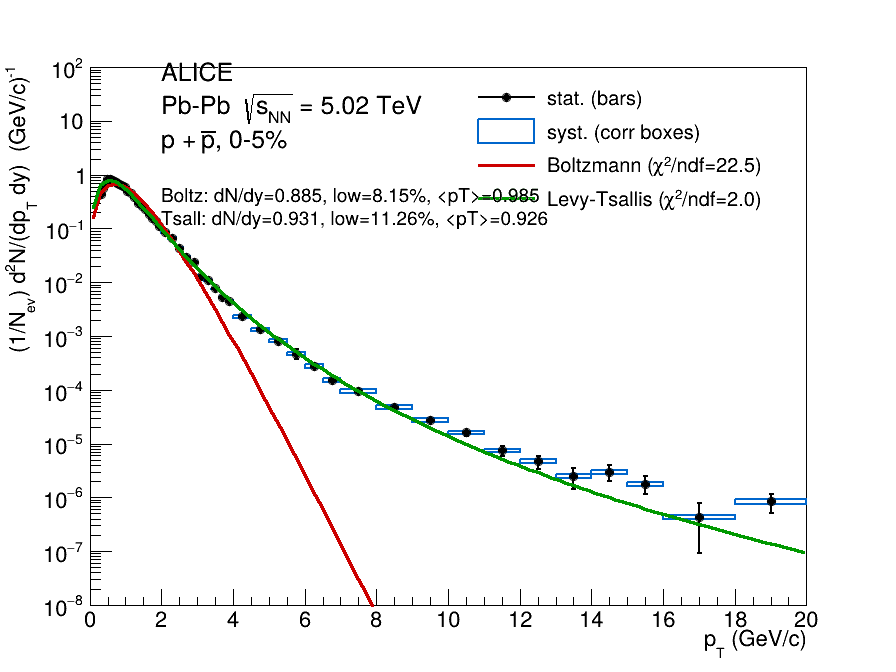

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1103.51
NDf                       =           49
Edm                       =  2.09431e-07
NCalls                    =           75
A                         =      40.3492   +/-   1.69325     
T                         =     0.301789   +/-   0.00232469  
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      96.6502
NDf                       =           48
Edm                       =  4.97386e-07
NCalls                    =          297
C                         =      2.54891   +/-   0.0494288   
T                         =      0.25631   +/-   0.00331726   	 (limited)
n                         =      9.05016   +/-   0.162292     	 (limited)


Info in <TCanvas::Print>: png file compare_boltz_vs_tsallis_0_5.png has been created
Info in <TCanvas::Print>: pdf file compare_boltz_vs_tsallis_0_5.pdf has been created


In [28]:


# -----------------------
# Settings (one centrality)
# -----------------------
label_text   = "p + #bar{p}, 0-5%"
m_p = 0.9382720813

# Fit + extrapolation domains
fit_min, fit_max = 0.3, 19.0
pt_low_data, pt_high_data, pt_max_int = 0.3, 20.0, 100.0

# Plot ranges (log-y)
x_plot_min, x_plot_max = 0.0, 20.0
y_plot_min, y_plot_max = 1e-8, 1e2

# Colors
col_boltz = r.kRed + 1
col_ts    = r.kGreen + 2
col_syst  = r.kAzure + 2
col_stat  = r.kBlack

# -----------------------
# Build effective-error graph for fitting: stat ⊕ syst_uncorr
# (uses h (values), h1 (stat), h3 (syst_uncorr))
# -----------------------
g_eff = r.TGraphErrors()
ip = 0
for ib in range(1, h.GetNbinsX()+1):
    y = h.GetBinContent(ib)
    if y <= 0: 
        continue
    x = h.GetBinCenter(ib)
    e_stat = h1.GetBinContent(ib)
    e_unc  = h3.GetBinContent(ib)
    e_eff  = math.sqrt(e_stat*e_stat + e_unc*e_unc)
    g_eff.SetPoint(ip, x, y)
    g_eff.SetPointError(ip, 0.0, e_eff)
    ip += 1

# -----------------------
# Model 1: Boltzmann (baseline)
# f(pT) = A * pT * mT * exp(-mT/T)
# -----------------------
def boltz_dpTdy(x, par):
    pT = x[0]
    A  = par[0]
    T  = par[1]
    mT = math.sqrt(pT*pT + m_p*m_p)
    return A * pT * mT * math.exp(-mT / T)

def boltz_pt_times(x, par):
    return x[0] * boltz_dpTdy(x, par)

f_b = r.TF1("f_boltz_cmp", boltz_dpTdy, fit_min, fit_max, 2)
f_b.SetParNames("A", "T")
f_b.SetParameters(1e2, 0.3)
f_b.SetLineColor(col_boltz)
f_b.SetLineWidth(3)

res_b = g_eff.Fit(f_b, "RS0")
chi2_b, ndf_b = res_b.Chi2(), res_b.Ndf()
chi2ndf_b = chi2_b/ndf_b if ndf_b>0 else float("nan")

cov_b = res_b.GetCovarianceMatrix()
par_b = array('d', [f_b.GetParameter(0), f_b.GetParameter(1)])
cov_b_arr = array('d', [cov_b(0,0), cov_b(0,1), cov_b(1,0), cov_b(1,1)])

# Integrals + errors
f_b.SetRange(0.0, pt_max_int)
I_low_b  = f_b.Integral(0.0, pt_low_data)
I_mea_b  = f_b.Integral(pt_low_data, pt_high_data)
I_hig_b  = f_b.Integral(pt_high_data, pt_max_int)
I_tot_b  = I_low_b + I_mea_b + I_hig_b
I_low_b_err = f_b.IntegralError(0.0, pt_low_data, par_b, cov_b_arr)
I_tot_b_err = f_b.IntegralError(0.0, pt_max_int,  par_b, cov_b_arr)

low_frac_b  = I_low_b/I_tot_b if I_tot_b>0 else 0.0
high_frac_b = I_hig_b/I_tot_b if I_tot_b>0 else 0.0

# <pT>
f_b_num = r.TF1("f_b_num", boltz_pt_times, 0.0, pt_max_int, 2)
f_b_num.SetParameters(par_b[0], par_b[1])
Num_b = f_b_num.Integral(0.0, pt_max_int)
Num_b_err = f_b_num.IntegralError(0.0, pt_max_int, par_b, cov_b_arr)
mean_pT_b = Num_b/I_tot_b if I_tot_b>0 else 0.0
mean_pT_b_err = mean_pT_b * math.sqrt((Num_b_err/Num_b)**2 + (I_tot_b_err/I_tot_b)**2) if (Num_b>0 and I_tot_b>0) else 0.0

# -----------------------
# Model 2: Lévy–Tsallis (common for pp; often used as flexible baseline)
# f(pT) = C * pT * (1 + (mT - m)/(n*T))^{-n}
# Params: C, T, n
# -----------------------
def tsallis_dpTdy(x, par):
    pT = x[0]
    C  = par[0]
    T  = par[1]
    n  = par[2]
    if T <= 0 or n <= 0:
        return 0.0
    mT = math.sqrt(pT*pT + m_p*m_p)
    arg = 1.0 + (mT - m_p)/(n*T)
    return C * pT * (arg ** (-n))

def tsallis_pt_times(x, par):
    return x[0] * tsallis_dpTdy(x, par)

f_t = r.TF1("f_tsallis_cmp", tsallis_dpTdy, fit_min, fit_max, 3)
f_t.SetParNames("C", "T", "n")
f_t.SetParameters(1e3, 0.2, 8.0)   # reasonable starts; can adjust if fit is unstable
f_t.SetParLimits(1, 0.01, 2.0)     # T > 0
f_t.SetParLimits(2, 1.0, 200.0)    # n > 1
f_t.SetLineColor(col_ts)
f_t.SetLineWidth(3)

res_t = g_eff.Fit(f_t, "RS0")
chi2_t, ndf_t = res_t.Chi2(), res_t.Ndf()
chi2ndf_t = chi2_t/ndf_t if ndf_t>0 else float("nan")

cov_t = res_t.GetCovarianceMatrix()
par_t = array('d', [f_t.GetParameter(0), f_t.GetParameter(1), f_t.GetParameter(2)])
cov_t_arr = array('d', [
    cov_t(0,0), cov_t(0,1), cov_t(0,2),
    cov_t(1,0), cov_t(1,1), cov_t(1,2),
    cov_t(2,0), cov_t(2,1), cov_t(2,2)
])

# Integrals + errors
f_t.SetRange(0.0, pt_max_int)
I_low_t  = f_t.Integral(0.0, pt_low_data)
I_mea_t  = f_t.Integral(pt_low_data, pt_high_data)
I_hig_t  = f_t.Integral(pt_high_data, pt_max_int)
I_tot_t  = I_low_t + I_mea_t + I_hig_t
I_low_t_err = f_t.IntegralError(0.0, pt_low_data, par_t, cov_t_arr)
I_tot_t_err = f_t.IntegralError(0.0, pt_max_int,  par_t, cov_t_arr)

low_frac_t  = I_low_t/I_tot_t if I_tot_t>0 else 0.0
high_frac_t = I_hig_t/I_tot_t if I_tot_t>0 else 0.0

# <pT>
f_t_num = r.TF1("f_t_num", tsallis_pt_times, 0.0, pt_max_int, 3)
f_t_num.SetParameters(par_t[0], par_t[1], par_t[2])
Num_t = f_t_num.Integral(0.0, pt_max_int)
Num_t_err = f_t_num.IntegralError(0.0, pt_max_int, par_t, cov_t_arr)
mean_pT_t = Num_t/I_tot_t if I_tot_t>0 else 0.0
mean_pT_t_err = mean_pT_t * math.sqrt((Num_t_err/Num_t)**2 + (I_tot_t_err/I_tot_t)**2) if (Num_t>0 and I_tot_t>0) else 0.0

# -----------------------
# Print comparison summary (important outputs)
# -----------------------
print("\n=== Boltzmann fit ===")
print(f"chi2/ndf = {chi2_b:.2f}/{ndf_b} = {chi2ndf_b:.2f}")
print(f"A = {f_b.GetParameter(0):.6g} ± {f_b.GetParError(0):.3g}")
print(f"T = {f_b.GetParameter(1):.6g} ± {f_b.GetParError(1):.3g} GeV")
print(f"dN/dy = {I_tot_b:.6g} ± {I_tot_b_err:.3g}")
print(f"low frac (0-0.3) = {100*low_frac_b:.3f}%")
print(f"high frac (>20)  = {100*high_frac_b:.6f}%")
print(f"<pT> = {mean_pT_b:.4f} ± {mean_pT_b_err:.4f} GeV/c")

print("\n=== Lévy–Tsallis fit ===")
print(f"chi2/ndf = {chi2_t:.2f}/{ndf_t} = {chi2ndf_t:.2f}")
print(f"C = {f_t.GetParameter(0):.6g} ± {f_t.GetParError(0):.3g}")
print(f"T = {f_t.GetParameter(1):.6g} ± {f_t.GetParError(1):.3g} GeV")
print(f"n = {f_t.GetParameter(2):.6g} ± {f_t.GetParError(2):.3g}")
print(f"dN/dy = {I_tot_t:.6g} ± {I_tot_t_err:.3g}")
print(f"low frac (0-0.3) = {100*low_frac_t:.3f}%")
print(f"high frac (>20)  = {100*high_frac_t:.6f}%")
print(f"<pT> = {mean_pT_t:.4f} ± {mean_pT_t_err:.4f} GeV/c")

# -----------------------
# Plot overlay (data + both fits)
# -----------------------
# style data (ALICE convention)
g_syst.SetFillStyle(0)
g_syst.SetLineColor(col_syst)
g_syst.SetLineWidth(2)

g_stat.SetMarkerStyle(20)
g_stat.SetMarkerSize(1.0)
g_stat.SetMarkerColor(col_stat)
g_stat.SetLineColor(col_stat)
g_stat.SetLineWidth(2)

c = r.TCanvas(f"c_cmp_{r.gRandom.Integer(10**9)}", "Boltzmann vs Tsallis", 900, 700)
c.SetLogy(1)

frame = c.DrawFrame(x_plot_min, y_plot_min, x_plot_max, y_plot_max)
frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

g_syst.Draw("E2 SAME")
g_stat.Draw("P SAME")

# draw both fit functions over full plot range (including low extrapolation)
f_b.SetRange(0.0, x_plot_max)
f_t.SetRange(0.0, x_plot_max)
f_b.Draw("SAME")
f_t.Draw("SAME")

leg = r.TLegend(0.52, 0.68, 0.88, 0.88)
leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.032)
leg.AddEntry(g_stat, "stat. (bars)", "lp")
leg.AddEntry(g_syst, "syst. (corr boxes)", "f")
leg.AddEntry(f_b, f"Boltzmann (#chi^{{2}}/ndf={chi2ndf_b:.1f})", "l")
leg.AddEntry(f_t, f"Levy-Tsallis (#chi^{{2}}/ndf={chi2ndf_t:.1f})", "l")
leg.Draw()

tex = r.TLatex()
tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
tex.DrawLatex(0.18, 0.88, "ALICE")
tex.DrawLatex(0.18, 0.83, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
tex.DrawLatex(0.18, 0.78, label_text)

# small comparison box (key derived outputs)
info = r.TLatex()
info.SetNDC(); info.SetTextFont(42); info.SetTextSize(0.030)
x0, y0, dy = 0.18, 0.70, 0.035
info.DrawLatex(x0, y0,        f"Boltz: dN/dy={I_tot_b:.3g}, low={100*low_frac_b:.2f}%, <pT>={mean_pT_b:.3f}")
info.DrawLatex(x0, y0-dy,     f"Tsall: dN/dy={I_tot_t:.3g}, low={100*low_frac_t:.2f}%, <pT>={mean_pT_t:.3f}")

c.Update()

out_png = "compare_boltz_vs_tsallis_0_5.png"
out_pdf = "compare_boltz_vs_tsallis_0_5.pdf"
c.SaveAs(out_png)
c.SaveAs(out_pdf)
display(Image(out_png))


## loop for every centralities

In [29]:
import ROOT as r
import math, os
import pandas as pd
from array import array
from IPython.display import display

# -----------------------
# OUTPUT
# -----------------------
outdir = "PbPb_p_pbar_Table5_Tsallis"
os.makedirs(outdir, exist_ok=True)

# -----------------------
# CENTRALITY LABELS
# IMPORTANT: if your ordering is reversed, flip this list.
# -----------------------
centralities_forward = ["0-5%", "5-10%", "10-20%", "20-30%", "30-40%",
                        "40-50%", "50-60%", "60-70%", "70-80%", "80-90%"]
centralities = centralities_forward  # change to list(reversed(...)) if needed

# -----------------------
# Physics + numerical settings
# -----------------------
m_p = 0.9382720813
fit_min, fit_max = 0.3, 19.0
pt_low_data, pt_high_data, pt_max_int = 0.3, 20.0, 100.0

# Plot range (log-y)
x_plot_min, x_plot_max = 0.0, 20.0
y_plot_min, y_plot_max = 1e-8, 1e2

# Colors
col_stat = r.kBlack
col_syst = r.kAzure + 2
col_fit  = r.kGreen + 2

# ROOT style
r.gStyle.SetOptStat(0)
r.gStyle.SetTextFont(42)
r.gStyle.SetLabelFont(42, "XYZ")
r.gStyle.SetTitleFont(42, "XYZ")
r.gStyle.SetLegendFont(42)

# -----------------------
# Lévy–Tsallis model
# f(pT) = C * pT * (1 + (mT - m)/(n*T))^{-n}
# Params: C, T, n
# -----------------------
def tsallis_dpTdy(x, par):
    pT = x[0]
    C  = par[0]
    T  = par[1]
    n  = par[2]
    if T <= 0 or n <= 0:
        return 0.0
    mT = math.sqrt(pT*pT + m_p*m_p)
    arg = 1.0 + (mT - m_p)/(n*T)
    return C * pT * (arg ** (-n))

def tsallis_pt_times(x, par):
    return x[0] * tsallis_dpTdy(x, par)

# -----------------------
# Helper: build h, errors, and graphs for one yk
# -----------------------
def build_graphs(d, k):
    h  = d.Get(f"Hist1D_y{k}")
    h1 = d.Get(f"Hist1D_y{k}_e1")  # stat
    h2 = d.Get(f"Hist1D_y{k}_e2")  # syst corr (boxes)
    h3 = d.Get(f"Hist1D_y{k}_e3")  # syst uncorr

    # stat graph
    g_stat = r.TGraphErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x  = h.GetBinCenter(ib)
        dy = h1.GetBinContent(ib)
        g_stat.SetPoint(ip, x, y)
        g_stat.SetPointError(ip, 0.0, dy)
        ip += 1

    # syst correlated boxes
    g_syst = r.TGraphAsymmErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x  = h.GetBinCenter(ib)
        dx = 0.5*h.GetBinWidth(ib)
        dy = h2.GetBinContent(ib)
        g_syst.SetPoint(ip, x, y)
        g_syst.SetPointError(ip, dx, dx, dy, dy)
        ip += 1

    # effective-fit graph: stat ⊕ syst_uncorr
    g_eff = r.TGraphErrors()
    ip = 0
    for ib in range(1, h.GetNbinsX()+1):
        y = h.GetBinContent(ib)
        if y <= 0: 
            continue
        x = h.GetBinCenter(ib)
        e_stat = h1.GetBinContent(ib)
        e_unc  = h3.GetBinContent(ib)
        e_eff  = math.sqrt(e_stat*e_stat + e_unc*e_unc)
        g_eff.SetPoint(ip, x, y)
        g_eff.SetPointError(ip, 0.0, e_eff)
        ip += 1

    # styles (drawing)
    g_stat.SetMarkerStyle(20)
    g_stat.SetMarkerSize(1.0)
    g_stat.SetMarkerColor(col_stat)
    g_stat.SetLineColor(col_stat)
    g_stat.SetLineWidth(2)

    g_syst.SetFillStyle(0)
    g_syst.SetLineColor(col_syst)
    g_syst.SetLineWidth(2)

    return h, h1, h2, h3, g_stat, g_syst, g_eff

# -----------------------
# MAIN LOOP
# -----------------------
rows = []

for idx, cent in enumerate(centralities, start=1):
    h, h1, h2, h3, g_stat, g_syst, g_eff = build_graphs(d, idx)

    # Tsallis TF1
    f_t = r.TF1(f"f_tsallis_y{idx}", tsallis_dpTdy, fit_min, fit_max, 3)
    f_t.SetParNames("C", "T", "n")
    f_t.SetParameters(1e3, 0.2, 8.0)
    f_t.SetParLimits(1, 0.01, 2.0)
    f_t.SetParLimits(2, 1.0, 200.0)
    f_t.SetLineColor(col_fit)
    f_t.SetLineWidth(3)

    res_t = g_eff.Fit(f_t, "RS0")
    chi2, ndf = res_t.Chi2(), res_t.Ndf()
    chi2ndf = chi2/ndf if ndf > 0 else float("nan")

    # parameters and covariance
    C_val, C_err = f_t.GetParameter(0), f_t.GetParError(0)
    T_val, T_err = f_t.GetParameter(1), f_t.GetParError(1)
    n_val, n_err = f_t.GetParameter(2), f_t.GetParError(2)

    cov = res_t.GetCovarianceMatrix()
    par_arr = array('d', [C_val, T_val, n_val])
    cov_arr = array('d', [
        cov(0,0), cov(0,1), cov(0,2),
        cov(1,0), cov(1,1), cov(1,2),
        cov(2,0), cov(2,1), cov(2,2)
    ])

    # integrals + errors
    f_t.SetRange(0.0, pt_max_int)

    I_low  = f_t.Integral(0.0, pt_low_data)
    I_meas = f_t.Integral(pt_low_data, pt_high_data)
    I_high = f_t.Integral(pt_high_data, pt_max_int)
    I_tot  = I_low + I_meas + I_high

    I_low_err = f_t.IntegralError(0.0, pt_low_data, par_arr, cov_arr)
    I_tot_err = f_t.IntegralError(0.0, pt_max_int,  par_arr, cov_arr)

    low_frac  = I_low/I_tot  if I_tot > 0 else 0.0
    high_frac = I_high/I_tot if I_tot > 0 else 0.0
    meas_frac = I_meas/I_tot if I_tot > 0 else 0.0

    # rough ratio error for low fraction
    low_frac_err = low_frac * math.sqrt((I_low_err/max(I_low,1e-30))**2 + (I_tot_err/max(I_tot,1e-30))**2) if (I_low>0 and I_tot>0) else 0.0

    # <pT>
    f_num = r.TF1(f"f_tsallis_num_y{idx}", tsallis_pt_times, 0.0, pt_max_int, 3)
    f_num.SetParameters(C_val, T_val, n_val)

    Num = f_num.Integral(0.0, pt_max_int)
    Num_err = f_num.IntegralError(0.0, pt_max_int, par_arr, cov_arr)

    mean_pT = Num / I_tot if I_tot > 0 else 0.0
    mean_pT_err = mean_pT * math.sqrt((Num_err/max(Num,1e-30))**2 + (I_tot_err/max(I_tot,1e-30))**2) if (Num>0 and I_tot>0) else 0.0

    # -----------------------
    # Plot (one per centrality)
    # -----------------------
    c = r.TCanvas(f"c_tsallis_{idx}_{r.gRandom.Integer(10**9)}", "", 900, 700)
    c.SetLogy(1)

    frame = c.DrawFrame(x_plot_min, y_plot_min, x_plot_max, y_plot_max)
    frame.GetXaxis().SetTitle("p_{T} (GeV/c)")
    frame.GetYaxis().SetTitle("(1/N_{ev}) d^{2}N/(dp_{T} dy)  (GeV/c)^{-1}")

    g_syst.Draw("E2 SAME")
    g_stat.Draw("P SAME")

    # fit curve including low extrapolation
    f_t.SetRange(0.0, x_plot_max)
    f_t.Draw("SAME")

    # measured boundaries
    l1 = r.TLine(pt_low_data,  y_plot_min, pt_low_data,  y_plot_max)
    l2 = r.TLine(pt_high_data, y_plot_min, pt_high_data, y_plot_max)
    for L in (l1, l2):
        L.SetLineStyle(2); L.SetLineWidth(2); L.SetLineColor(r.kGray+2)
        L.Draw("SAME")

    # legend
    leg = r.TLegend(0.55, 0.72, 0.88, 0.88)
    leg.SetBorderSize(0); leg.SetFillStyle(0); leg.SetTextSize(0.033)
    leg.AddEntry(g_stat, "stat. (bars)", "lp")
    leg.AddEntry(g_syst, "syst. (corr boxes)", "f")
    leg.AddEntry(f_t, f"Levy-Tsallis  (#chi^{{2}}/ndf={chi2ndf:.1f})", "l")
    leg.Draw()

    # ALICE labels
    tex = r.TLatex()
    tex.SetNDC(); tex.SetTextFont(42); tex.SetTextSize(0.04)
    tex.DrawLatex(0.18, 0.88, "ALICE")
    tex.DrawLatex(0.18, 0.83, "Pb-Pb  #sqrt{s_{NN}} = 5.02 TeV")
    tex.DrawLatex(0.18, 0.78, f"p + #bar{{p}}, {cent}")

    # results box
    info = r.TLatex()
    info.SetNDC(); info.SetTextFont(42); info.SetTextSize(0.030)
    x0, y0, dy = 0.55, 0.66, 0.035
    info.DrawLatex(x0, y0,        f"dN/dy = {I_tot:.3g} #pm {I_tot_err:.2g}")
    info.DrawLatex(x0, y0-dy,     f"<pT> = {mean_pT:.3f} #pm {mean_pT_err:.3f} GeV/c")
    info.DrawLatex(x0, y0-2*dy,   f"low frac (0-0.3) = {100*low_frac:.2f}% #pm {100*low_frac_err:.2f}%")

    c.Update()

    pdf = os.path.join(outdir, f"PbPb_p_pbar_{cent.replace('%','pct')}_tsallis.pdf")
    png = os.path.join(outdir, f"PbPb_p_pbar_{cent.replace('%','pct')}_tsallis.png")
    c.SaveAs(pdf)
    c.SaveAs(png)

    # -----------------------
    # Save summary row
    # -----------------------
    rows.append({
        "centrality": cent,
        "chi2/ndf": chi2ndf,
        "C": C_val, "C_err": C_err,
        "T_GeV": T_val, "T_err_GeV": T_err,
        "n": n_val, "n_err": n_err,
        "dN/dy": I_tot, "dN/dy_err": I_tot_err,
        "low_yield_frac_%": 100*low_frac, "low_yield_frac_err_%": 100*low_frac_err,
        "measured_frac_%": 100*meas_frac,
        "high_yield_frac_%": 100*high_frac,
        "<pT>_GeV/c": mean_pT, "<pT>_err_GeV/c": mean_pT_err
    })

# -----------------------
# Save table
# -----------------------
df = pd.DataFrame(rows)
csv_path = os.path.join(outdir, "summary_table_tsallis.csv")
df.to_csv(csv_path, index=False)

display(df)
print("\nSaved outputs:")
print("  folder:", outdir)
print("  CSV   :", csv_path)


,centrality,chi2/ndf,C,C_err,T_GeV,T_err_GeV,n,n_err,dN/dy,dN/dy_err,low_yield_frac_%,low_yield_frac_err_%,measured_frac_%,high_yield_frac_%,<pT>_GeV/c,<pT>_err_GeV/c
0,0-5%,188.194161,78.416969,0.382592,0.515885,0.001685,50.393231,1.674135,60.897685,0.234609,5.537658,0.034071,94.462342,2.208242e-09,1.311242,0.007351
1,5-10%,179.507143,65.646304,0.263508,0.517844,0.001537,51.611195,1.587090,51.201767,0.164970,5.514623,0.028066,94.485377,2.030864e-09,1.313987,0.006317
2,10-20%,250.410917,52.307302,0.181331,0.490179,0.001394,32.086274,0.570917,38.665959,0.111691,5.804085,0.025864,94.195915,2.721917e-08,1.287848,0.005689
3,20-30%,162.551141,39.117293,0.164946,0.490699,0.001501,34.844194,0.761151,28.829765,0.089689,5.821676,0.030088,94.178324,1.389912e-08,1.282532,0.005854
4,30-40%,148.461447,29.788219,0.140384,0.450347,0.001510,22.429160,0.338704,20.116731,0.069197,6.326790,0.036368,93.673209,1.999200e-07,1.237785,0.006184
5,40-50%,88.472115,21.911519,0.124821,0.405497,0.001489,16.635850,0.196816,13.226884,0.056858,7.038231,0.049545,92.961768,1.189362e-06,1.177525,0.007223
6,50-60%,41.174271,15.306269,0.110032,0.366164,0.001717,13.283747,0.148115,8.299367,0.040464,7.788323,0.066367,92.211672,5.071062e-06,1.123584,0.007736
7,60-70%,14.800377,9.874031,0.110861,0.318627,0.002276,10.883264,0.133588,4.603011,0.034054,8.975225,0.117982,91.024760,1.561514e-05,1.046881,0.010882
8,70-80%,4.290729,5.519145,0.077567,0.287145,0.002623,9.791127,0.132866,2.293048,0.019718,9.992339,0.160008,90.007636,2.560667e-05,0.989470,0.011893
9,80-90%,2.013545,2.548915,0.049429,0.256310,0.003317,9.050162,0.162292,0.930783,0.010314,11.261908,0.242756,88.738061,3.097695e-05,0.925512,0.014243



Saved outputs:
  folder: PbPb_p_pbar_Table5_Tsallis
  CSV   : PbPb_p_pbar_Table5_Tsallis/summary_table_tsallis.csv
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      9033.32
NDf                       =           48
Edm                       =   4.8165e-08
NCalls                    =          320
C                         =       78.417   +/-   0.382592    
T                         =     0.515885   +/-   0.00168461   	 (limited)
n                         =      50.3932   +/-   1.67413      	 (limited)
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      8616.34
NDf                       =           48
Edm                       =  1.31634e-05
NCalls                    =          372
C                         =      65.6463   +/-   0.263508    
T                         =     0.517844   +/-   0.00153738   	 (limited)
n                         =      51.6112   +/-   1.58709      	 (lim

Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_0-5pct_tsallis.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_0-5pct_tsallis.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_5-10pct_tsallis.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_5-10pct_tsallis.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_10-20pct_tsallis.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_10-20pct_tsallis.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_20-30pct_tsallis.pdf has been created
Info in <TCanvas::Print>: png file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_20-30pct_tsallis.png has been created
Info in <TCanvas::Print>: pdf file PbPb_p_pbar_Table5_Tsallis/PbPb_p_pbar_30-40pct_tsallis.pdf has been create